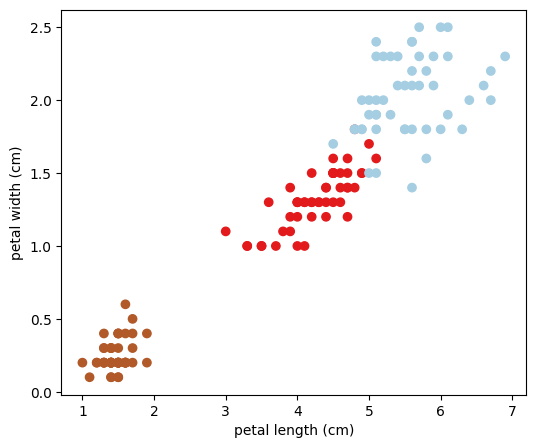

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

# Load the iris data
iris = datasets.load_iris()
X = iris.data[:, 2:]
y = iris.target

# Split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Plot the data
plt.figure(figsize=(6,5))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='Paired_r')
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.show()

## MODEL 0 : Logistic Regression version

Train set accuracy = 0.9375
Test set accuracy = 1.0


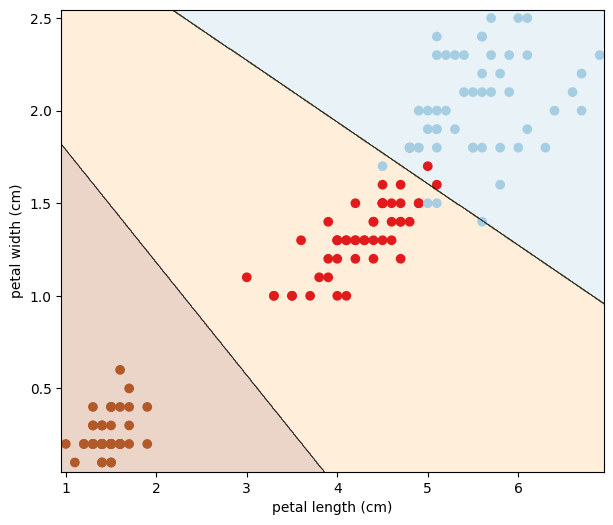

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression  # Change here

# Model: Logistic Regression version
# Create a pipeline
clf_logreg = Pipeline([
    ("scaler", StandardScaler()),  # Standardize features
    ("log_reg", LogisticRegression())  # Change here
])

# Train the model
clf_logreg.fit(X_train, y_train)

# Evaluate the model's accuracy
print("Train set accuracy = " + str(clf_logreg.score(X_train, y_train)))
print("Test set accuracy = " + str(clf_logreg.score(X_test, y_test)))

# Plot the decision boundaries
def plot_decision_boundary(clf, X, y, cmap='Paired_r'):
    h = 0.005  # Boundary lines' resolution
    x_min, x_max = X[:,0].min() - 10*h, X[:,0].max() + 10*h
    y_min, y_max = X[:,1].min() - 10*h, X[:,1].max() + 10*h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(7,6))
    plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.25)  # Background
    plt.contour(xx, yy, Z, colors='k', linewidths=0.2)  # Boundary lines
    plt.scatter(X[:,0], X[:,1], c=y, cmap=cmap);  # Data points
    plt.xlabel(iris.feature_names[2])
    plt.ylabel(iris.feature_names[3])

plot_decision_boundary(clf_logreg, X, y)


## MODEL 1: Linear SVC version

In [6]:
# Model 1: Linear SVC version
# Create a pipeline
clf_linSVC = Pipeline([
    ("linear_svc", LinearSVC(C=200, loss="hinge", max_iter=100000))
])

# Train the model
clf_linSVC.fit(X_train, y_train)

# Evaluate the model's accuracy
print("Train set accuracy = " + str(clf_linSVC.score(X_train, y_train)))
print("Test set accuracy = " + str(clf_linSVC.score(X_test, y_test)))

Train set accuracy = 0.9464285714285714
Test set accuracy = 0.9736842105263158


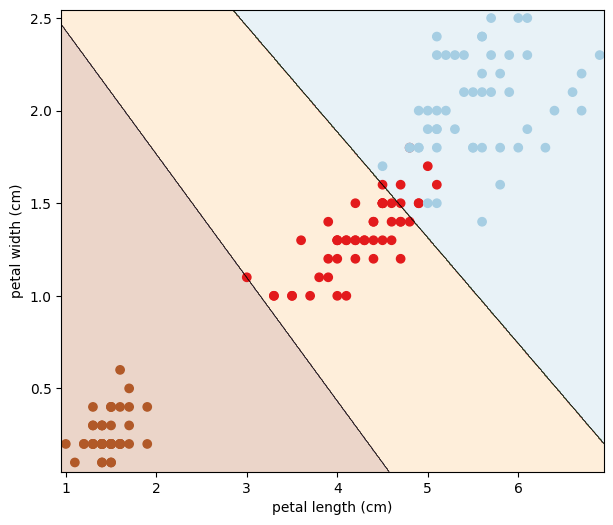

In [7]:
# Plot the decision boundaries
def plot_decision_boundary(clf, X, y, cmap='Paired_r'):
    h = 0.005  # Boundary lines' resolution
    x_min, x_max = X[:,0].min() - 10*h, X[:,0].max() + 10*h
    y_min, y_max = X[:,1].min() - 10*h, X[:,1].max() + 10*h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(7,6))
    plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.25)  # Background
    plt.contour(xx, yy, Z, colors='k', linewidths=0.2)  # Boundary lines
    plt.scatter(X[:,0], X[:,1], c=y, cmap=cmap);  # Data points
    plt.xlabel(iris.feature_names[2])
    plt.ylabel(iris.feature_names[3])

plot_decision_boundary(clf_linSVC, X, y)

## MODEL 2 : Gaussian RBF Kernel version

In [8]:
# Model 2: Gaussian RBF Kernel version
# Create a pipeline
clf_SVC = Pipeline([
    ("linear_svc", SVC(kernel="rbf", gamma=2, C=10, max_iter=10000))
])

# Train the model
clf_SVC.fit(X_train, y_train)

# Evaluate the model's accuracy
print("Train set accuracy = " + str(clf_SVC.score(X_train, y_train)))
print("Test set accuracy = " + str(clf_SVC.score(X_test, y_test)))


Train set accuracy = 0.9553571428571429
Test set accuracy = 1.0


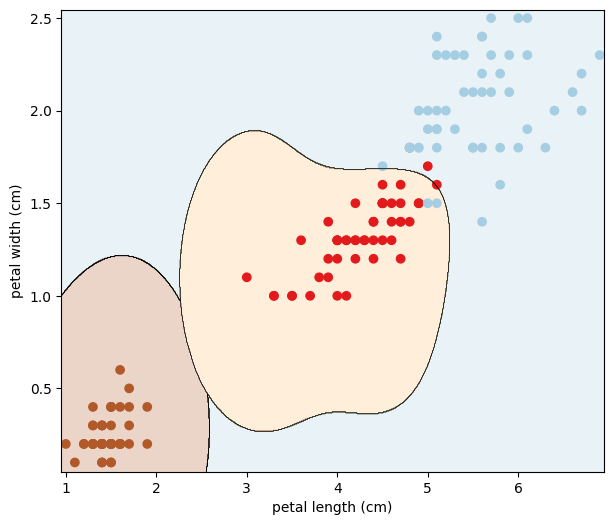

In [9]:
# Plot the decision boundaries
plot_decision_boundary(clf_SVC, X, y)